In [1]:
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# gala
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic
import gala

import superfreq as sf

In [2]:
pot = gp.MilkyWayPotential()

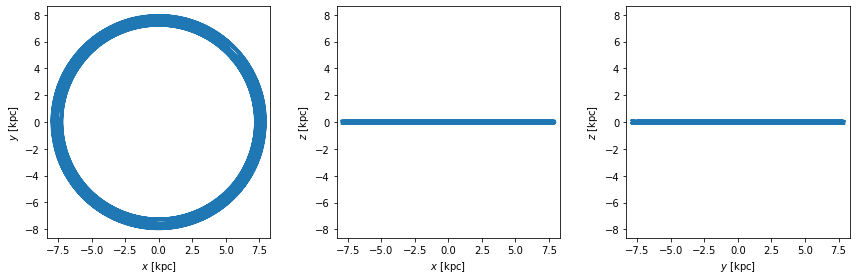

In [3]:
w0 = gd.PhaseSpacePosition(
    pos=[-8, 0, 0] * u.kpc,
    vel=[4, 220, 10] * u.km/u.s
)

orbit = pot.integrate_orbit(w0, dt=1*u.Myr, t1=0, t2=5*u.Gyr)
orbit.plot();

In [4]:
print(w0)

pos=(-8., 0., 0.) kpc
vel=(4., 220., 10.) km / s


In [5]:
all_freqs = []
t2s = 2 ** np.arange(-2., 5+1, 1)
for t2 in t2s:
    orbit = pot.integrate_orbit(w0, dt=1*u.Myr, t1=0, t2=t2*u.Gyr)
    pp = gc.cartesian_to_poincare_polar(orbit.w().T).T

    freq = sf.SuperFreq(p=4, t=orbit.t.to_value(u.Gyr))

    fs = [pp[i] + 1j*pp[i+3] for i in range(3)]
    result = freq.find_fundamental_frequencies(fs, min_freq=1)

    all_freqs.append(result.fund_freqs)

In [6]:
print(type(orbit))

print(orbit)


<class 'gala.dynamics.orbit.Orbit'>
pos=[(-8.        , 0.        , 0.        ),
 (-7.99239784, 0.22499668, 0.01022712),
 (-7.97777151, 0.44979561, 0.02039336), ...,
 ( 3.40216967, 6.47338892, 0.11840732),
 ( 3.61182488, 6.34323853, 0.11369146),
 ( 3.81763502, 6.20633528, 0.1081832 )] kpc
vel=[(0.00409085,  0.22499668,  0.01022712),
 (0.01111425,  0.22489781,  0.01019668),
 (0.01813665,  0.22460102,  0.01010555), ...,
 (0.21145879, -0.12671867, -0.00430725),
 (0.20773268, -0.13352682, -0.00511206),
 (0.20377006, -0.14021983, -0.00588919)] kpc / Myr


In [14]:
a=[(2,3),(5,6)]

print(a[0])
print(type(a))

[(2, 3), (5, 6)]
<class 'list'>


<ipython-input-61-83eadfff5a1d>:2: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)



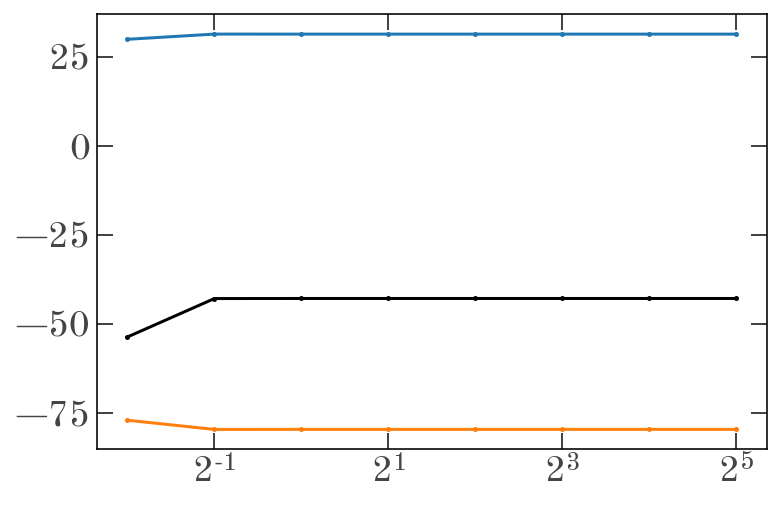

In [61]:
plt.plot(t2s, np.array(all_freqs))
plt.xscale('log', basex=2)